In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as itls
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline as cbs

In [3]:
#Load in the csv files
headings = ['Query', 'SwissProt', '%Identity', 'Length', 'Mismatches', 'Gap Opens', 
          'Q.start', 'Q.end', 'S.start', 'S.end', 'E-value', 'Score', 'Norm Score']

blosum45 = pd.read_csv("blastp_blosum45.csv", ',', names= headings)
blosum50 = pd.read_csv("blastp_blosum50.csv", ',', names= headings)
blosum62 = pd.read_csv("blastp_blosum62.csv", ',', names= headings)
blosum80 = pd.read_csv("blastp_blosum80.csv", ',', names= headings)
blosum90 = pd.read_csv("blastp_blosum90.csv", ',', names= headings)
pam30 = pd.read_csv("blastp_pam30.csv", ',', names= headings)
pam70 = pd.read_csv("blastp_pam70.csv", ',', names= headings)
pam250 = pd.read_csv("blastp_pam250.csv", ',', names= headings)

In [58]:
#Load in the csv of queries
queries = pd.read_csv("Rfelis_faa_sequences.csv", ',', usecols= [0])

In [5]:
#Score normalizing
def norm_score (matrix):
    prot = matrix.iat[0, 0]
    denom = matrix.iat[0,11]

    for p in range(0,len(matrix['Query'])):
        if matrix.iat[p, 0] is prot:
            matrix.iat[p, 12] = matrix.iat[p, 11]/denom
        else:
            prot = matrix.iat[p,0]
            denom = matrix.iat[p,11]
            matrix.iat[p,12] = denom/denom

In [8]:
#Normalize the scores for all matrices
matrices = [blosum45, blosum50, blosum62, blosum80, blosum90, pam30, pam70, pam250]

for matrix in matrices:
    norm_score(matrix)

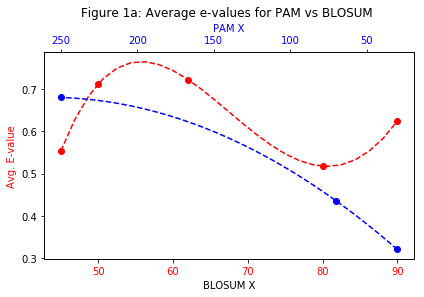

In [11]:
#Figure 1a
#Plot distance vs. average e-value

avg_pam30 = pam30['E-value'].mean()
avg_pam70 = pam70['E-value'].mean()
avg_pam250 = pam250['E-value'].mean()
avg_blosum45 = blosum45['E-value'].mean()
avg_blosum50 = blosum50['E-value'].mean()
avg_blosum62 = blosum62['E-value'].mean()
avg_blosum80 = blosum80['E-value'].mean()
avg_blosum90 = blosum90['E-value'].mean()

pam_values = [avg_pam250,avg_pam70,avg_pam30]
blos_values = [avg_blosum45, avg_blosum50, avg_blosum62,avg_blosum80,avg_blosum90]

pam_dist = [250,70,30]
blos_dist = [45,50,62,80,90]

y_pam = np.linspace(30, 250, 50)
y_blos = np.linspace(45,90,25)

poly_pam_eval = cbs([30, 70, 250], [avg_pam30, avg_pam70, avg_pam250])
poly_blos_eval = lagrange(blos_dist, blos_values)

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('BLOSUM X')
ax1.set_ylabel('Avg. E-value', color=color)
ax1.plot(blos_dist, blos_values, 'ro')
ax1.plot(y_blos, poly_blos_eval(y_blos), 'r--')
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('PAM X', color=color)  # we already handled the x-label with ax1
ax2.plot(pam_dist, pam_values, 'bo')
ax2.plot(y_pam, poly_pam_eval(y_pam), 'b--')
ax2.tick_params(axis='x', labelcolor=color)
ax2.invert_xaxis()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Figure 1a: Average e-values for PAM vs BLOSUM \n\n")
plt.show()

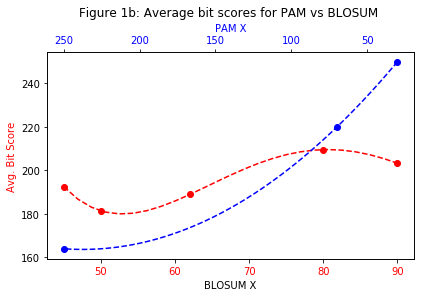

In [12]:
#Figure 1b
#Do the same for bit-score
avg_pam30 = pam30['Score'].mean()
avg_pam70 = pam70['Score'].mean()
avg_pam250 = pam250['Score'].mean()
avg_blosum45 = blosum45['Score'].mean()
avg_blosum50 = blosum50['Score'].mean()
avg_blosum62 = blosum62['Score'].mean()
avg_blosum80 = blosum80['Score'].mean()
avg_blosum90 = blosum90['Score'].mean()

pam_vals = [avg_pam250,avg_pam70,avg_pam30]
blos_vals = [avg_blosum45, avg_blosum50, avg_blosum62,avg_blosum80,avg_blosum90]

poly_pam_score = cbs([30, 70, 250], [avg_pam30, avg_pam70, avg_pam250])
poly_blos_score = lagrange(blos_dist, blos_vals)

fig, ax1 = plt.subplots()

color = 'red'
ax1.set_xlabel('BLOSUM X')
ax1.set_ylabel('Avg. Bit Score', color=color)
ax1.plot(blos_dist, blos_vals, 'ro')
ax1.plot(y_blos, poly_blos_score(y_blos), 'r--')
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_xlabel('PAM X', color=color)  # we already handled the x-label with ax1
ax2.invert_xaxis()
ax2.plot(pam_dist, pam_vals, 'bo')
ax2.plot(y_pam, poly_pam_score(y_pam), 'b--')
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Figure 1b: Average bit scores for PAM vs BLOSUM \n\n")
plt.show()

In [13]:
#Version with actual bit score
def mat_difference(a, b):
    aq = a['Query'].tolist()
    ap = a['SwissProt'].tolist()
    
    a_pairs = []
    for i in range(0,len(aq)):
        a_pairs.append([aq[i],ap[i]])
    
    bq = b['Query'].tolist()
    bp = b['SwissProt'].tolist()
    
    b_pairs = []
    for i in range(0,len(bq)):
        b_pairs.append([bq[i],bp[i]])
    
    p = 0
    values = []
    for pair in a_pairs:
        if pair not in b_pairs:
            if a.iat[p, 11] < 150:
                values.append(a.iat[p, 11])

        p += 1
    
    return values

In [14]:
#Just meet threshold of t
def threshold(scores, t):
    temp = scores
    scores = []

    for s in temp:
        if s < t:
            scores.append(s)
            
    return scores

In [16]:
#Find symmetric differences for all matrices based on bit score
#Cutting off at bitscores greater than 150
pam250_70 = mat_difference(pam250, pam70)
pam70_30 = mat_difference(pam70, pam30)
pam30_scores = threshold(pam30['Score'].tolist(), 150)

In [17]:
#Make reference matrices match criteria of mat_difference
blosum45_scores = threshold(blosum45['Score'].tolist(), 120)
blosum50_scores = threshold(blosum50['Score'].tolist(), 120)
blosum62_scores = threshold(blosum62['Score'].tolist(), 120)
blosum80_scores = threshold(blosum80['Score'].tolist(), 120)
blosum90_scores = threshold(blosum90['Score'].tolist(), 120)

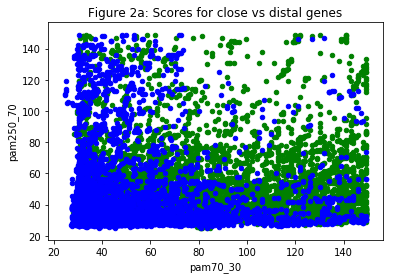

In [165]:
#Figure 2a
pam_scores = [pam30_scores, pam70_30, pam250_70]
pre_T = pd.DataFrame(pam_scores)

#Take Transpose
score_set = pre_T.T

score_set.columns = ['pam30', 'pam70_30', 'pam250_70']

score_set = score_set[score_set.pam70_30.notnull()]

ax = score_set.plot(kind='scatter', x = 'pam30', y = 'pam70_30', color = 'Green', use_index = False, title = 'Figure 2a: Scores for close vs distal genes')
score_set.plot(kind='scatter', x = 'pam70_30', y = 'pam250_70', color = 'Blue', use_index = False, ax=ax)
plt.show()

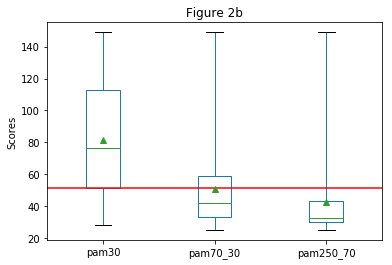

In [19]:
#Displaying the quartile overlap
plt.figure()
score_set.plot(kind='box', showmeans=True,whis='range',bootstrap=5000,title='Figure 2b')
plt.axhline(y=51.1, color='red') #FEEL FREE TO DELETE THIS LINE IF YOU DON'T WANT THE RED HORIZONTAL LINE
plt.ylabel('Scores')
plt.show()

In [20]:
score_set['pam30'].describe()

count    6531.000000
mean       81.382637
std        35.635671
min        28.200000
25%        51.100000
50%        76.100000
75%       113.000000
max       149.000000
Name: pam30, dtype: float64

In [21]:
score_set['pam70_30'].describe()

count    6531.000000
mean       50.428740
std        24.209228
min        24.900000
25%        33.300000
50%        41.700000
75%        58.500000
max       149.000000
Name: pam70_30, dtype: float64

In [22]:
score_set['pam250_70'].describe()

count    6531.000000
mean       42.572608
std        23.926109
min        25.100000
25%        29.800000
50%        32.700000
75%        42.900000
max       149.000000
Name: pam250_70, dtype: float64

In [23]:
#Add a column to mark if the match is self/close (0) or distal (1)
group = [0] * len(pam30)

pam30.insert(13, 'Group', group)

group = [0] * len(pam70)

pam70.insert(13, 'Group', group)

group = [0] * len(pam250)

pam250.insert(13, 'Group', group)

In [74]:
#Mark if the pair is self/close or distal
sc_weight = 51.1

def group(matrix):
    for p in range(0, len(matrix)):
        if matrix.iat[p, 11] >= sc_weight:
            matrix.iat[p, 13] = 0
        else:
            matrix.iat[p, 13] = 1
    return matrix

In [25]:
#Mark the matrices with s/c value
pam30 = group(pam30)
pam70 = group(pam70)
pam250 = group(pam250)

In [26]:
#Create list of pairs found all three pam matrices
def pairs(a, l, groups):
    aq = a['Query'].tolist()
    ap = a['SwissProt'].tolist()
    ag = a['Group'].tolist()
    
    a_pairs = []
    for i in range(0,len(aq)):
        a_pairs.append([aq[i],ap[i],ag[i]])
    
    for q,p,g in a_pairs:
        qp = [q,p]
        l.append(qp)
        groups.append(g)
    
    return l,g

In [27]:
#Send each pam into pairs function
p_pairs = []
p_groups = []
pam_pairs, groups = pairs(pam30, p_pairs, p_groups)
pam_pairs, groups = pairs(pam70, p_pairs, p_groups)
pam_pairs, groups = pairs(pam250, p_pairs, p_groups)

In [43]:
#Create Series with qp pair and score based on group value
def group_scores2(blosum, p_pairs, p_groups):
    s_close = []
    s_distal = []
    
    #Take the qp pairs from blosum
    blosum_q = blosum['Query'].tolist()
    blosum_p = blosum['SwissProt'].tolist()
    blosum_s = blosum['Score'].tolist()
    
    #Add to s_close and s_distal IFF found in pam pair list
    for i in range(0,len(blosum_q)):
        qp = [blosum_q[i],blosum_p[i]]

        if qp in p_pairs:
            qps = [blosum_q[i],blosum_p[i],blosum_s[i]]
            x = p_pairs.index(qp)

            if p_groups[x] == 0:
                s_close.append(qps)
            else:
                s_distal.append(qps)
            
    return s_close, s_distal

In [44]:
#Generate the s/c and d lists for each BLOSUM matrix (no max and self)
close45, distal45 = group_scores2(blosum45, pam_pairs, p_groups)
close50, distal50 = group_scores2(blosum50, pam_pairs, p_groups)
close62, distal62 = group_scores2(blosum62, pam_pairs, p_groups)
close80, distal80 = group_scores2(blosum80, pam_pairs, p_groups)
close90, distal90 = group_scores2(blosum90, pam_pairs, p_groups)

In [45]:
#Generate csv files for easier DataFrame creation (no max and self)
import csv

with open('rf_close45_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in close45:
        filewriter.writerow([q, p, s])
        
with open('rf_distal45_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in distal45:
        filewriter.writerow([q, p, s])

with open('rf_close50_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in close50:
        filewriter.writerow([q, p, s])
        
with open('rf_distal50_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in distal50:
        filewriter.writerow([q, p, s])

with open('rf_close62_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in close62:
        filewriter.writerow([q, p, s])
        
with open('rf_distal62_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in distal62:
        filewriter.writerow([q, p, s])

with open('rf_close80_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in close80:
        filewriter.writerow([q, p, s])

with open('rf_distal80_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in distal80:
        filewriter.writerow([q, p, s])
        
with open('rf_close90_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in close90:
        filewriter.writerow([q, p, s])

with open('rf_distal90_2.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for q,p,s in distal90:
        filewriter.writerow([q, p, s])

In [46]:
#Make DataFrames from csv files (no max and self)

titles = ['Query', 'SwissProt', 'Score']
c_45 = pd.read_csv('rf_close45_2.csv',',',names=titles)
d_45 = pd.read_csv('rf_distal45_2.csv',',',names=titles)
c_50 = pd.read_csv('rf_close50_2.csv',',',names=titles)
d_50 = pd.read_csv('rf_distal50_2.csv',',',names=titles)
c_62 = pd.read_csv('rf_close62_2.csv',',',names=titles)
d_62 = pd.read_csv('rf_distal62_2.csv',',',names=titles)
c_80 = pd.read_csv('rf_close80_2.csv',',',names=titles)
d_80 = pd.read_csv('rf_distal80_2.csv',',',names=titles)
c_90 = pd.read_csv('rf_close90_2.csv',',',names=titles)
d_90 = pd.read_csv('rf_distal90_2.csv',',',names=titles)

In [47]:
#Perform threshold comparison
c45_scores = threshold(c_45['Score'].tolist(), 400)
d45_scores = threshold(d_45['Score'].tolist(), 55)
c50_scores = threshold(c_50['Score'].tolist(), 400)
d50_scores = threshold(d_50['Score'].tolist(), 55)
c62_scores = threshold(c_62['Score'].tolist(), 400)
d62_scores = threshold(d_62['Score'].tolist(), 55)
c80_scores = threshold(c_80['Score'].tolist(), 400)
d80_scores = threshold(d_80['Score'].tolist(), 55)
c90_scores = threshold(c_90['Score'].tolist(), 400)
d90_scores = threshold(d_90['Score'].tolist(), 55)

In [48]:
#Figure 4
#Plot the max(close and distal) with respect to the BLOSUM values

avg_c45 = c_45['Score'].mean()
avg_d45 = d_45['Score'].mean()
avg_c50 = c_50['Score'].mean()
avg_d50 = d_50['Score'].mean()
avg_c62 = c_62['Score'].mean()
avg_d62 = d_62['Score'].mean()
avg_c80 = c_80['Score'].mean()
avg_d80 = d_80['Score'].mean()
avg_c90 = c_90['Score'].mean()
avg_d90 = d_90['Score'].mean()

c_scores = [avg_c45, avg_c50, avg_c62, avg_c80, avg_c90]
d_scores = [avg_d45, avg_d50, avg_d62, avg_d80, avg_d90]

#c_scores = c45_scores
#c_scores.extend(c62_scores)
#c_scores.extend(c80_scores)
#c_scores.extend(c90_scores)

#d_scores = d45_scores
#d_scores.extend(d62_scores)
#d_scores.extend(d80_scores)
#d_scores.extend(d90_scores)

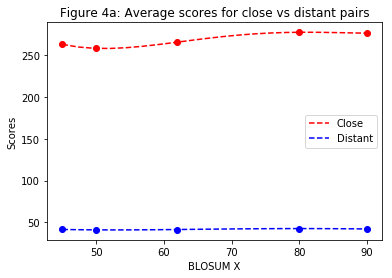

In [49]:
y = np.linspace(45,90,20)
y_close = lagrange(blos_dist, c_scores)
y_dist = lagrange(blos_dist, d_scores)

fig4, ax = plt.subplots()
ax.plot(blos_dist, y_close(blos_dist), 'ro')
ax.plot(y, y_close(y), 'r--', label='Close')
ax.plot(blos_dist, y_dist(blos_dist), 'bo')
ax.plot(y, y_dist(y), 'b--', label='Distant')
ax.set_ylabel('Scores')
ax.set_xlabel('BLOSUM X')
plt.legend(loc=5)
plt.title("Figure 4a: Average scores for close vs distant pairs")
plt.show()

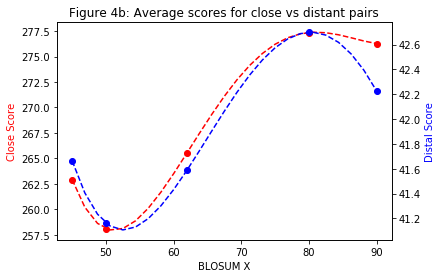

In [50]:
fig4, ax_1 = plt.subplots()

y_close = lagrange(blos_dist, c_scores)
y_dist = lagrange(blos_dist, d_scores)
y1 = np.linspace(45,90,25,endpoint=True)
y2 = np.linspace(45,90,25,endpoint=True)

ax_1.set_xlabel('BLOSUM X')
ax_1.set_ylabel('Close Score', color='r')
ax_1.plot(blos_dist, y_close(blos_dist), 'ro')
ax_1.plot(y1, y_close(y1), 'r--')
ax_1.tick_params(axis='x')

color = 'blue'
ax_2 = ax_1.twinx()  # instantiate a second axes that shares the same x-axis
ax_2.set_ylabel('Distal Score', color=color)  # we already handled the x-label with ax1
ax_2.plot(blos_dist, y_dist(blos_dist), 'bo')
ax_2.plot(y2, y_dist(y2), 'b--')
ax_2.tick_params(axis='x', labelcolor=color)


#fig4.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Figure 4b: Average scores for close vs distant pairs")
plt.show()

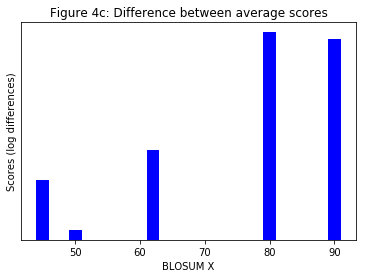

In [169]:
diff_scores = [c_scores[i] - d_scores[i] for i in range(len(c_scores))]

plt.figure()
plt.bar(blos_dist, diff_scores, width=2, color='blue', align='center', log=True)
plt.ylabel('Scores (log differences)')
plt.xlabel('BLOSUM X')
plt.title('Figure 4c: Difference between average scores')
plt.show()

In [167]:
diff_scores

[221.25866605668844,
 216.9396073898796,
 223.97492372324237,
 234.66057344822573,
 234.0483339317296]

In [56]:
#Extract the HGT based info
"""
wps = []
with open('yp_wp', 'r') as csvfile:
    ypreader = csv.reader(csvfile, delimiter='|')
    for row in ypreader:
        wps.append(row[1])

with open('wps.csv', 'w') as csvfile:
    filewriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for w in wps:
        filewriter.writerow(w)
'''

In [110]:
labels = ['Query', 'Length', 'Product', '#Hits', 'Self', 'Close', 'Distal', 'Match', 'HGT']
hgts = pd.read_csv('Rfelis_HGTector_Info.csv', ',', names=labels)

In [139]:
def hgtector(hgts, b):
    hq = hgts['Query'].tolist()
    hgt = hgts['HGT'].tolist()
    
    h_pairs = []
    for i in range(0,len(hq)):
        h_pairs.append([hq[i],hgt[i]])
    
    bq = b['Query'].tolist()
        
    b_hgts = []
    for q in bq:
        if q in hq:
            i = hq.index(q)
            if hgt[i] == 1:
                if q not in b_hgts:
                    b_hgts.append(q)
    
    return b_hgts

In [142]:
#Store list of pairs with HGTs
hgt45 = hgtector(hgts, d_45)
hgt50 = hgtector(hgts, d_50)
hgt62 = hgtector(hgts, d_62)
hgt80 = hgtector(hgts, d_80)
hgt90 = hgtector(hgts, d_90)

In [166]:
print ('BLOSUM45 HGT count:', len(hgt45))
print ('BLOSUM50 HGT count:',len(hgt50))
print ('BLOSUM62 HGT count:',len(hgt62))
print ('BLOSUM80 HGT count:',len(hgt80))
print ('BLOSUM90 HGT count:',len(hgt90))


BLOSUM45 HGT count: 93
BLOSUM50 HGT count: 100
BLOSUM62 HGT count: 97
BLOSUM80 HGT count: 95
BLOSUM90 HGT count: 97


matches = []

ps = d_45['SwissProt'].tolist()
qs = d_45['Query'].tolist()

pairs45 = []
for i in range(0,len(ps)):
    pairs45.append([qs[i],ps[i]])

q2 = pam250['Query'].tolist()
p2 = pam250['SwissProt'].tolist()

pairs250 = []
for i in range(0,len(q2)):
    pairs250.append([q2[i],p2[i]])

for q,p in pairs45:
    qp = [q,p]
    if qp in pairs250:
        i = pam250['SwissProt'].tolist().index(p)
        s = pam250['Score'].tolist()[i]
        if s > 51.1:
            matches.append(p)
print (len(matches))